In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import sklearn.cluster

In [2]:
pd.read_csv('qualifying_runs.csv')

,twitch_name,run_id,created_at,0,1,2,3,4,5,6,7,8,9,end
0,speckyyt,4k80,2019-09-01T14:33:45.311Z,121647,246720,134030,112510,64540,71450,174720,140090,122860,300318,1488885
1,chromium_light,4jrn,2019-08-29T00:57:28.577Z,112049,233565,127857,143834,129790,48434,145731,327429,200774,722222,2191685
2,studkip,4gzr,2019-08-11T07:46:28.096Z,100973,216845,89238,107279,117613,35552,119165,114737,99253,278603,1279259
3,stonecoldhard1101,4gaa,2019-08-06T15:23:07.222Z,122891,259702,106394,132637,113173,44022,137020,195012,153456,457141,1721448
4,stonecoldhard1101,4g3y,2019-08-05T15:46:18.025Z,128981,249254,107429,150635,111314,45565,143285,252804,145296,404244,1738807
5,dreadedfall,4fjo,2019-08-01T16:41:59.156Z,132524,281056,108820,129985,162297,39513,138415,237659,138370,330716,1699355
6,lucky_hamburger,4fa5,2019-07-30T17:37:35.526Z,89238,103036,119881,119194,137967,119431,127556,97449,79748,112652,1106152
7,lucky_hamburger,4f08,2019-07-28T19:16:22.185Z,87524,107729,116268,140046,184827,136259,98385,98105,80744,118955,1168842
8,yimpy_,4d85,2019-07-17T03:32:43.061Z,313071,149844,127664,149098,81975,103113,169342,145564,60336,200057,1500064
9,lopretey,4d10,2019-07-15T21:53:43.152Z,134977,304327,132023,143158,126688,46775,220035,556665,213705,251602,2129955


This is a plot showing how folks performed on the first split of the mario 64 speedrun (for folks with exactly 10 splits). As you can tell, there are 2 big spikes. These spikes represent tricks used to acheive that particular split. Let's see if we can programatically dive into them

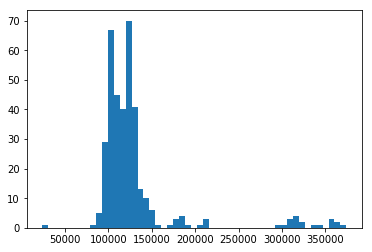

In [10]:
split_0 = pd.read_csv('qualifying_runs.csv')['0']
a = plt.hist(split_0, bins='auto')
plt.show()

To pull out that information we'll use [kmeans clustering](https://blog.easysol.net/machine-learning-algorithms-3/)

In [43]:
X = pd.read_csv('qualifying_runs.csv')[['0']]
cluster_count = 10 # this number is tunable for more or fewer clusters
kmeans = sklearn.cluster.KMeans(n_clusters=cluster_count).fit(X)

After running the kmeans algorithim and letting the clusters converge, we can see 8 distinct clusters of runs 

In [44]:
sorted(kmeans.cluster_centers_)

[array([23602.]),
 array([100114.61386139]),
 array([111670.51428571]),
 array([121229.92537313]),
 array([129011.57142857]),
 array([143942.2962963]),
 array([180967.875]),
 array([206835.2]),
 array([310730.72727273]),
 array([355822.5])]

Below we plot a scatter chart showing each of the clusters

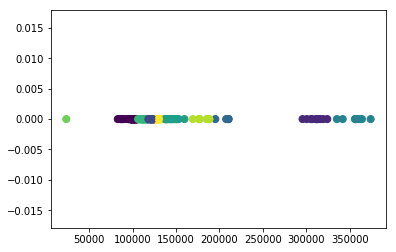

In [45]:
y_kmeans = kmeans.predict(X)
plt.scatter(X['0'], np.zeros(X['0'].shape), c=y_kmeans, s=50, cmap='viridis')
plt.show()

In [46]:
X['y'] = y_kmeans

With this information, you can essentially tell someone what the next best group is, and who they should check out to improve

In [47]:
X

,0,y
0,121647,2
1,112049,6
2,100973,0
3,122891,2
4,128981,9
5,132524,9
6,89238,0
7,87524,0
8,313071,1
9,134977,9
